In [1]:
# create a file with random values
# print histogram 
# print line plot
# calculate statistics
# print colored pairplot by grp
# print violinplot

In [37]:
170*2+90*6+100+35*3

1085

In [24]:
import numpy
import math

# create a file with random values
fo = open('tmpfile.txt','w')

for i in range(0,100):
    a = math.sin(10*numpy.random.rand())
    b = math.cos(10*numpy.random.rand())
    c = 10*numpy.random.rand()

    s = str(a) +' '+str(b) +' '+str(c)
    
    fo.write("%s %s %s\n" % (a, b, c))
#    fo.write('{} {} {}\n'.format(a,b,c))

fo.close()    

# print histogram 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


#fo = open('tmpfile.txt','r')

sales = pd.read_csv('tmpfile.txt', header=None,sep='\s+' )
sales.columns=['a','b','c']

#sales.head()
#sales.describe()

#customer_group = customers.groupby('name')
#customer_group.size()



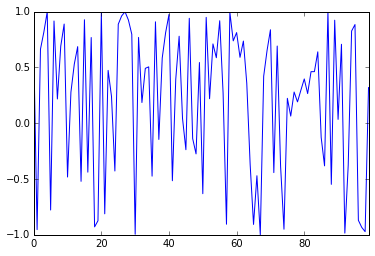

In [3]:
import plotly.plotly as py

# (*) To communicate with Plotly's server, sign in with credentials file
import plotly.plotly as py

# (*) Useful Python/Plotly tools
import plotly.tools as tls

# (*) Graph objects to piece together plots
from plotly.graph_objs import *

sales['a'].plot()


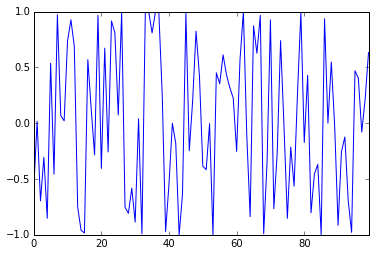

In [4]:
sales['b'].plot()

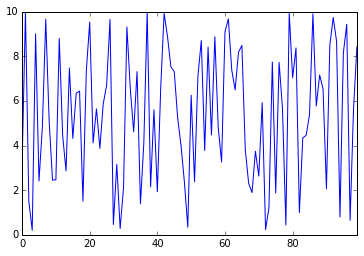

In [5]:
sales['c'].plot()


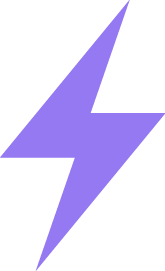

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/kernel/__init__.py:13: ShimWarning:

The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.



In [6]:

from lightning import Lightning
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')
n=1000
#cp = [asarray(color_palette('Blues', 100)[random.choice(range(100))])*255 for i in range(n)]
ap = numpy.random.rand(n)
sp = numpy.random.rand(n)*15+8
lgn.scatter(sales['a'],sales['b'], values=sales['c'],alpha=ap, size=sp,colormap='YlOrRd')


In [7]:
sales['grp'] = ['A' if x > 5 else 'B' if  x > 3 else 'C' for x in sales.sum(axis=1)]
sales.head()

,a,b,c,grp
0,0.683481,-0.596310,3.081687,B
1,-0.953582,0.016511,9.991879,A
2,0.663503,-0.696470,1.496151,C
3,0.816953,-0.306102,0.201796,C
4,0.999187,-0.851848,9.004029,A


In [8]:
#statistics
sales.describe()


,a,b,c
count,100.000000,100.000000,100.000000
mean,0.214682,0.025751,5.411925
std,0.649514,0.658814,2.983326
min,-0.999962,-0.999899,0.201796
25%,-0.383156,-0.549192,2.591684
50%,0.395181,-0.000232,5.622389
75%,0.771412,0.616003,8.152291
max,0.999834,0.999939,9.999257


In [9]:
#statistics
sales.mean()

a    0.214682
b    0.025751
c    5.411925
dtype: float64

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



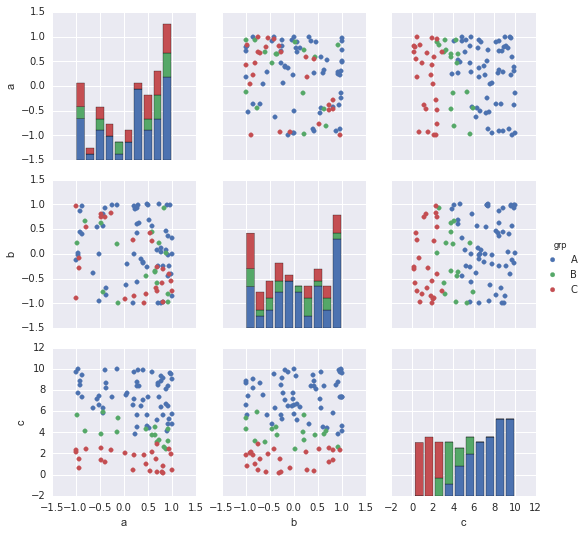

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.pairplot(sales[["a", "b", "c"]])
sns.pairplot(sales,hue='grp', hue_order=['A','B','C'])
#plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:650: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



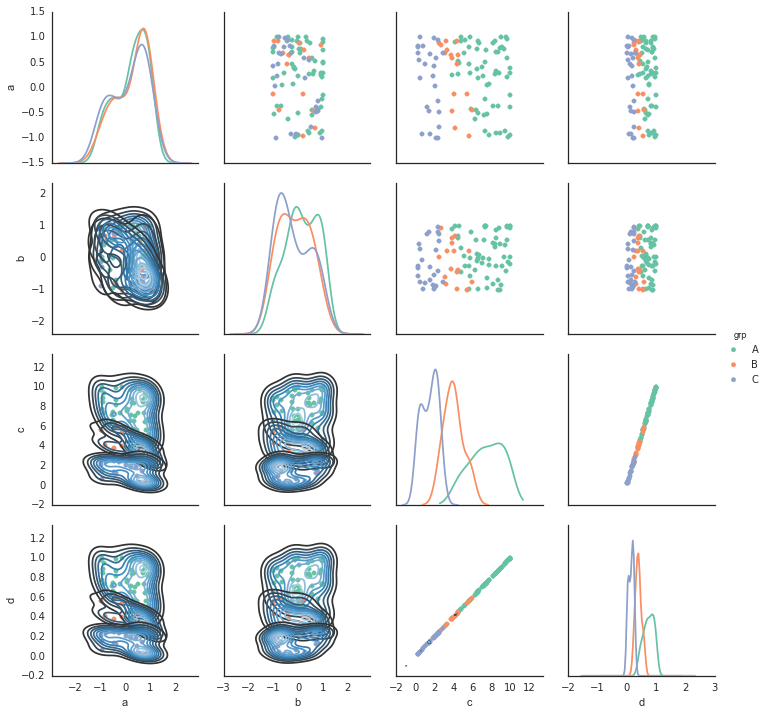

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.pairplot(sales[["a", "b", "c"]])
#sns.pairplot(sales,hue='grp', hue_order=['A','B','C'])
#plt.show()
g = sns.pairplot(sales, hue="grp", palette="Set2", diag_kind="kde", size=2.5, hue_order=['A','B','C'])
g.map_lower(sns.kdeplot, cmap="Blues_d", hue="grp")



/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



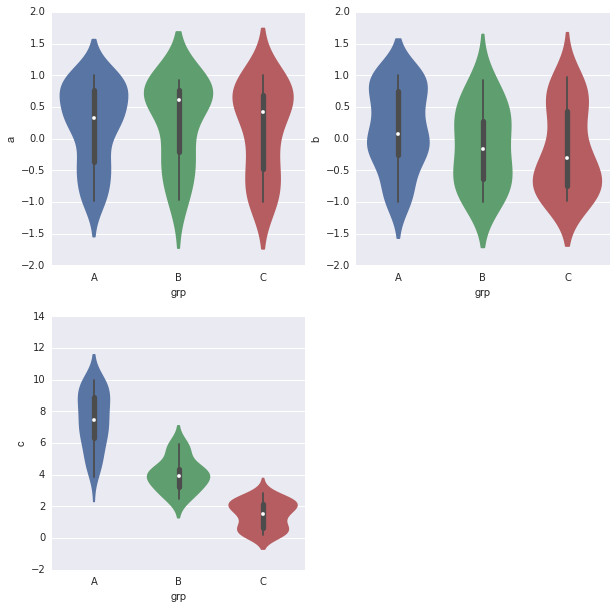

In [11]:
sales = sales.sort_values(by='grp')
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(sales.columns):
    if column == 'grp':
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.violinplot(x='grp', y=column, data=sales)

In [12]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1)
good_columns = sales._get_numeric_data().dropna(axis=1)
kmeans_model.fit(good_columns)
labels = kmeans_model.labels_

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning:

inspect.getargspec() is deprecated, use inspect.signature() instead



/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



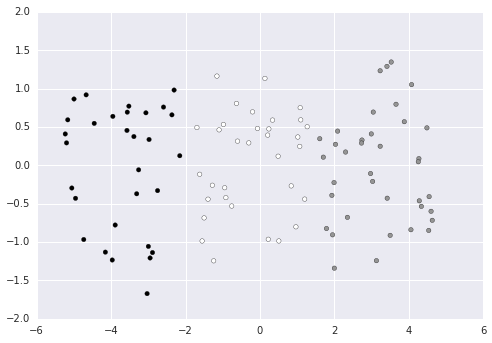

In [13]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

In [14]:
s=sales['a'].sum()
t=sales['a'].mean()

print (s, t)

21.4681832513 0.214681832513


In [15]:
sales['d'] = sales['c']/sales['c'].max()
foo = sales[['a','b','d']]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



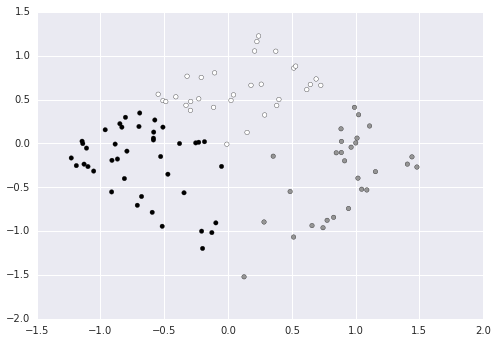

In [16]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1)
good_columns = foo._get_numeric_data().dropna(axis=1)
kmeans_model.fit(good_columns)
labels = kmeans_model.labels_

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



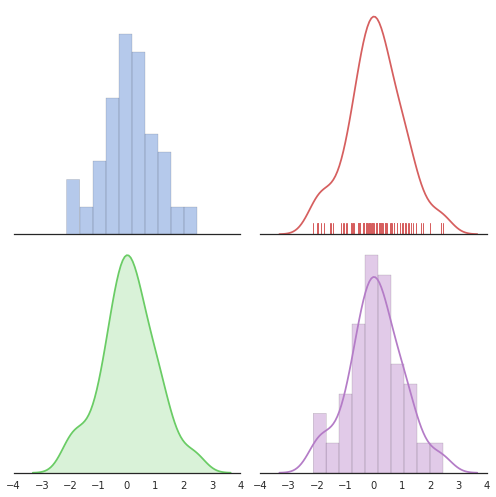

In [25]:
# Test new seaborn features
sns.set(style="white",palette="muted",color_codes=True)
rs = np.random.RandomState(10)

f,axes = plt.subplots(2,2,figsize=(7,7),sharex=True)
sns.despine(left=True)

d = rs.normal(size=100)

sns.distplot(d,kde=False,color="b",ax=axes[0,0])
sns.distplot(d,hist=False,rug=True,color="r",ax=axes[0,1])
sns.distplot(d,hist=False,color="g",kde_kws={"shade":True},ax=axes[1,0])
sns.distplot(d,color="m",ax=axes[1,1])

plt.setp(axes,yticks=[])
plt.tight_layout()


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



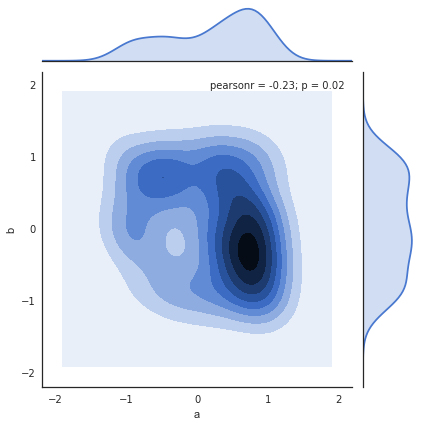

In [39]:
sns.jointplot(x="a", y="b", data=sales, kind="kde");


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



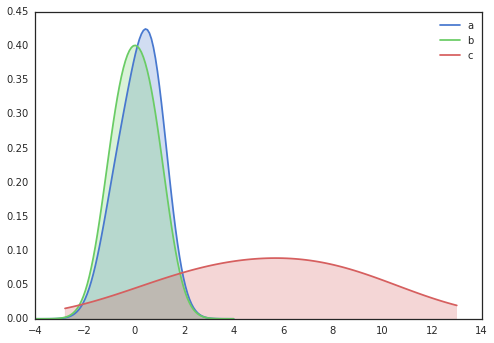

In [47]:
sns.kdeplot(sales['a'],bw=1,label="a",shade=True)
sns.kdeplot(sales['b'], bw=1,label="b",shade=True)
sns.kdeplot(sales['c'], bw=1, label="c",shade=True)
plt.legend();
# the shading gives the warning

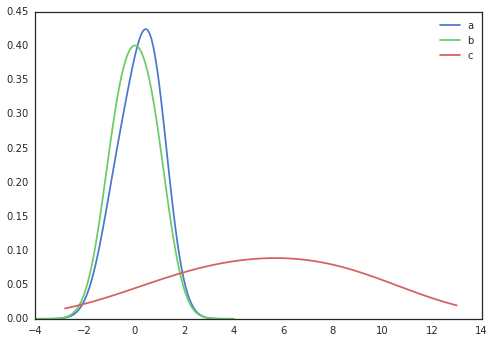

In [48]:
sns.kdeplot(sales['a'],bw=1,label="a")
sns.kdeplot(sales['b'], bw=1,label="b")
sns.kdeplot(sales['c'], bw=1, label="c")
plt.legend();